# Comparing EOB and PN Phenom waveform approximants for Aligned spin bank of mass 5-50 solar masses 
SEOBNRv4_ROM and IMRPHENOMXAS

In [3]:
with open("banksim.ini", 'a') as fout:
    fout.write("""\
[inspinj]
f-lower = 15 
i-distr = fixed
fixed-inc = 0
m-distr = totalMassRatio 
disable-milkyway =
min-mratio = 1. 
max-mratio = 10. 
min-distance = 1000  
l-distr = random  
min-mtotal = 9
waveform = SEOBNRv4_ROM
enable-spin =
aligned = 
max-mtotal = 100
min-spin1 = 0 
max-spin1 = 0.95
min-spin2 = 0 
max-spin2 = 0.95
max-distance = 1000 
d-distr = uniform 
gps-start-time = 1000000000 
gps-end-time =   1000010000
time-interval = 0. 
time-step = 1. 
seed = 3 

[executables]
banksim = /cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.18.0/bin/pycbc_banksim
[workflow]
accounting-group = ligo.dev.o3.cbc.explore.test
log-path = /home/isha.anantpurkar/FinalAlignedSpinBank/WaveformComparisons/QuadrupoleOnly/logs
;use-gpus =
bank-file = AlignedSpinGeomfaster5_50.xml
injections-per-job = 50
templates-per-job = 500 

[banksim]
psd-model = aLIGOZeroDetHighPower 
template-approximant = IMRPhenomXAS 
; template-phase-order = 7 
; template-amplitude-order = 0 
; template-spin-order = 7
template-start-frequency = 20
template-sample-rate = 8192
signal-approximant = SEOBNRv4_ROM
; signal-phase-order = 7 
; signal-amplitude-order = 0 
; signal-spin-order = 
signal-sample-rate = 8192
signal-start-frequency = 20
filter-low-frequency = 20
filter-sample-rate = 4096
filter-signal-length = 256
mchirp-window = 0.10
""")

In [9]:
! tail -n10 banksim.dag.dagman.out

05/02/21 12:21:52 DAG status: 0 (DAG_STATUS_OK)
05/02/21 12:21:52 Of 2853 nodes total:
05/02/21 12:21:52  Done     Pre   Queued    Post   Ready   Un-Ready   Failed
05/02/21 12:21:52   ===     ===      ===     ===     ===        ===      ===
05/02/21 12:21:52  2853       0        0       0       0          0        0
05/02/21 12:21:52 0 job proc(s) currently held
05/02/21 12:21:52 DAGMan Runtime Statistics: [ EventCycleTimeAvg = 1.643463933609322; EventCycleTimeCount = 927.0; EventCycleTimeMax = 14.9383111000061; EventCycleTimeMin = 0.0001790523529052734; EventCycleTimeStd = 2.843384833711403; EventCycleTimeSum = 1523.491066455841; LogProcessCycleTimeAvg = 0.0017360146298553; LogProcessCycleTimeCount = 528.0; LogProcessCycleTimeMax = 0.0107569694519043; LogProcessCycleTimeMin = 0.0001318454742431641; LogProcessCycleTimeStd = 0.001474624394180014; LogProcessCycleTimeSum = 0.9166157245635986; SleepCycleTimeAvg = 5.004832352377965; SleepCycleTimeCount = 927.0; SleepCycleTimeMax = 5.1113779

! which pycbc_banksim

In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pycbc import pnutils
import numpy as np
import pylab

In [2]:
res = np.loadtxt("results.dat")
match = res[:,0]

tmass1 = res[:,1]
tmass2 = res[:,2]
tspin1x = res[:,3]
tspin1y = res[:,4]
tspin1z = res[:,5]
tspin2x = res[:,6]
tspin2y = res[:,7]
tspin2z = res[:,8]
tmchirp, teta = pnutils.mass1_mass2_to_mchirp_eta(tmass1, tmass2)

imass1 = res[:,9]
imass2 = res[:,10]
ispin1x = res[:,11]
ispin1y = res[:,12]
ispin1z = res[:,13]
ispin2x = res[:,14]
ispin2y = res[:,15]
ispin2z = res[:,16]
imchirp, ieta = pnutils.mass1_mass2_to_mchirp_eta(imass1, imass2)

q = np.maximum(imass1/imass2, imass2/imass1)
s1m = (ispin1x**2+ispin1y**2+ispin1z**2)**0.5
s2m = (ispin2x**2+ispin2y**2+ispin2z**2)**0.5

(array([0.00125654, 0.00198953, 0.00272251, 0.00481675, 0.01109948,
        0.02973822, 0.06774869, 0.08722513, 0.10356021, 1.        ]),
 array([0.      , 0.099992, 0.199984, 0.299976, 0.399968, 0.49996 ,
        0.599952, 0.699944, 0.799936, 0.899928, 0.99992 ]),
 <a list of 10 Patch objects>)

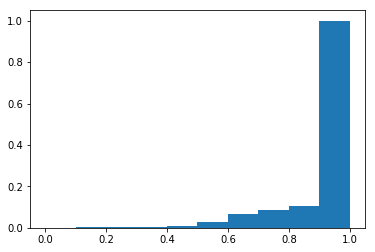

In [3]:
plt.hist(match, cumulative=True, density=True)

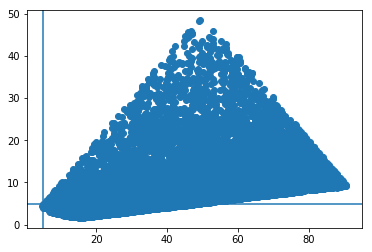

In [4]:
plt.scatter(imass1, imass2)
plt.axhline(5)
plt.axvline(5)

In [5]:
indices = []
for i in range(len(imass2)):
    if imass2[i]<5.0:
        indices.append(i)
        
match_new=np.delete(match, indices)

tmass1_new = np.delete(tmass1, indices) 
tmass2_new = np.delete(tmass2, indices)
tspin1x_new = np.delete(tspin1x , indices)
tspin1y_new = np.delete(tspin1y , indices)
tspin1z_new = np.delete(tspin1z , indices)
tspin2x_new = np.delete(tspin2x , indices)
tspin2y_new = np.delete(tspin2y , indices)
tspin2z_new = np.delete(tspin2z , indices)
tmchirp_new = np.delete(tmchirp, indices)
teta_new = np.delete(teta , indices)

imass1_new = np.delete(imass1, indices)
imass2_new = np.delete(imass2 , indices)
ispin1x_new = np.delete(ispin1x , indices)
ispin1y_new = np.delete(ispin1y , indices)
ispin1z_new = np.delete(ispin1z , indices)
ispin2x_new = np.delete(ispin2x , indices)
ispin2y_new = np.delete(ispin2y , indices)
ispin2z_new = np.delete(ispin2z , indices)
imchirp_new = np.delete(imchirp, indices) 
ieta_new = np.delete(ieta, indices)
q_new = np.delete(q, indices)
s1m_new = np.delete(s1m , indices)
s2m_new = np.delete(s2m , indices)

(array([0.00150253, 0.0103811 , 0.02445021, 0.02950417, 0.03510449,
        0.03865592, 0.04302691, 0.04808086, 0.10667942, 1.        ]),
 array([0.54575 , 0.591167, 0.636584, 0.682001, 0.727418, 0.772835,
        0.818252, 0.863669, 0.909086, 0.954503, 0.99992 ]),
 <a list of 10 Patch objects>)

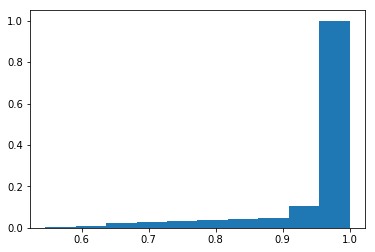

In [6]:
plt.hist(match_new, cumulative=True, density=True)

Text(0.5,1,'Comparing EOB and Phenom aligned spin waveforms')

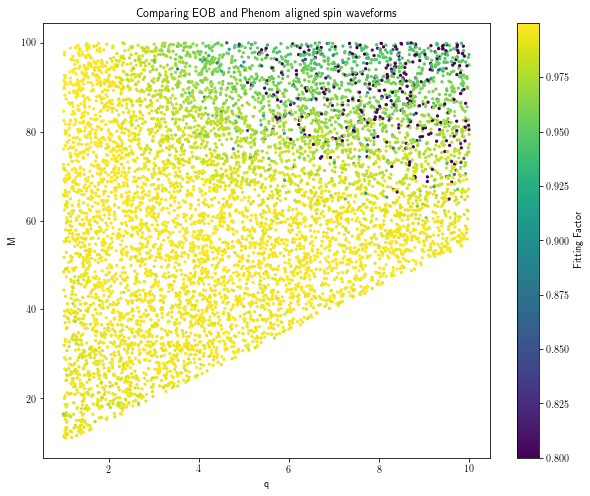

In [10]:
from matplotlib import rc
rc('text', usetex=True)

plt.figure(figsize = (10,8))
plt.scatter( q_new,imass1_new + imass2_new, s=5 ,c = match_new, vmin=0.80)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("q")
plt.ylabel("M")
#plt.xlim([1,8])
plt.title("Comparing EOB and Phenom aligned spin waveforms")

Text(0.5,1,'Comparing SEOBNRv4ROM and IMRPHENOMXAS aligned spin waveforms')

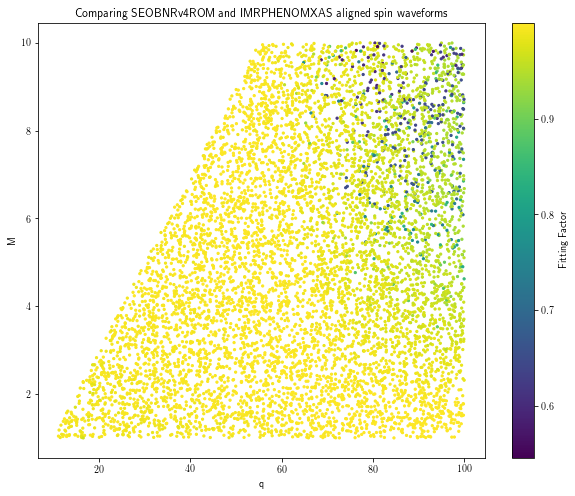

In [29]:
plt.figure(figsize = (10,8))
plt.scatter(imass1_new + imass2_new, q_new, s=5 ,c = match_new)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("q")
plt.ylabel("M")
#plt.xlim([1,8])
plt.title("Comparing SEOBNRv4ROM and IMRPHENOMXAS aligned spin waveforms")

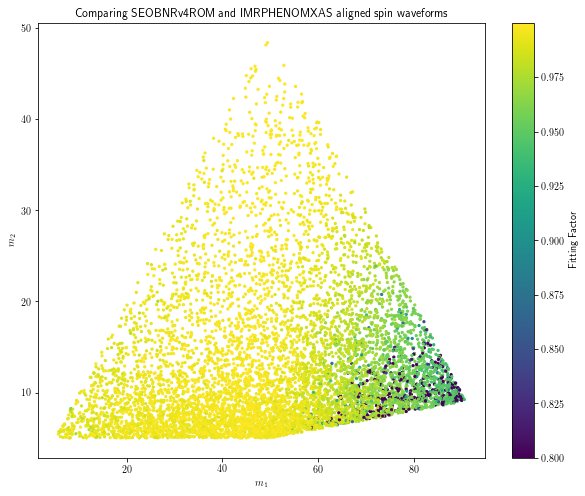

In [37]:
plt.figure(figsize = (10,8))
plt.scatter(imass1_new,imass2_new, s=5 ,c = match_new, vmin=0.80)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("$m_1$")
plt.ylabel("$m_2$")
#plt.xlim([1,8])
plt.title("Comparing SEOBNRv4ROM and IMRPHENOMXAS aligned spin waveforms")
plt.savefig("AlignedSpinWaveformComparisonsQuadrupolem1m2.png")

In [17]:
from pycbc import conversions
ichi_eff_new = conversions.chi_eff(imass1_new, imass2_new, ispin1z_new, ispin2z_new)

Text(0.5,1,'Comparing SEOBNRv4ROM and IMRPHENOMXAS aligned spin waveforms')

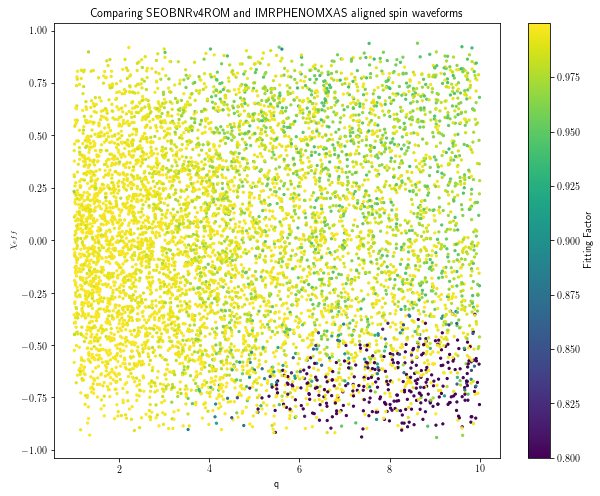

In [32]:
plt.figure(figsize = (10,8))
plt.scatter(q_new, ichi_eff_new, s=5 ,c = match_new, vmin=0.8)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("q")
plt.ylabel("$\\chi_{eff}$")
#plt.xlim([1,8])
plt.title("Comparing SEOBNRv4ROM and IMRPHENOMXAS aligned spin waveforms")

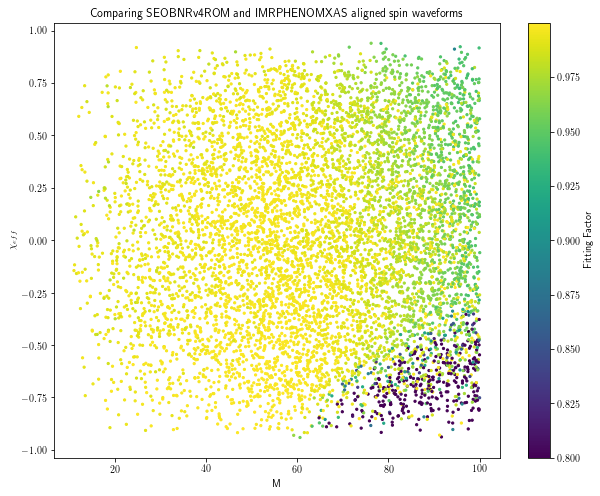

In [36]:
plt.figure(figsize = (10,8))
plt.scatter(imass1_new+imass2_new, ichi_eff_new, s=5 ,c = match_new, vmin=0.8)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("M")
plt.ylabel("$\\chi_{eff}$")
#plt.xlim([1,8])
plt.title("Comparing SEOBNRv4ROM and IMRPHENOMXAS aligned spin waveforms")
plt.savefig("AlignedSpinWaveformComparisonsQuadrupoleM.png")